In [8]:
import pandas as pd
import numpy as np
import os
from time import time
from glob import glob
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [5]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option("max_colwidth", 50)
eval_path = "/home/eam/MasterThesis/Thesis/TrackEval/data/trackers/kitti/kitti_2d_box_train/"
evals_path  = sorted([os.path.join(eval_path,a) for a in os.listdir(eval_path) if os.path.isdir(os.path.join(eval_path,a))])
df_all_evals = None
for eval_folder in evals_path:
    eval_name = eval_folder.split("/")[-1]
#     if len(eval_name) > 40:
#         eval_name = f"{eval_name[:40]}'<br\>'{eval_name[40:]}"
#     print(f"Processing {eval_name}")
    eval_file = os.path.join(eval_folder, "pedestrian_summary.txt")
    df_eval = pd.read_csv(eval_file, delimiter=r"\s+")
    df_eval.index = [eval_name]
    
    eval_info_path = os.path.join(eval_folder, "info.txt")
    with open(eval_info_path) as json_data:
        eval_info = json.load(json_data)
    
    eval_info["HOTA"] = df_eval.HOTA[0]
    
    columns = ['track', "max_age","n_init","max_feat_dist","max_mix_dist","mix_coef","max_distance","NNBudget","max_depth","feat_extractor","depth_area","dist_method","detector","HOTA"]
    row = np.array([list(eval_info.values())])
    if 'additional' in eval_info.keys():
        columns.append('additional')
        row[[0],[-2,-1]] = row[[0],[-1,-2]]
    
    eval_comparison_df = pd.DataFrame(row, columns = columns, index = [eval_name])
    if df_all_evals is None:
        df_all_evals = eval_comparison_df
    else:
        df_all_evals= df_all_evals.append(eval_comparison_df)
#     break



df_all_evals = df_all_evals[['track', "max_age","n_init","max_feat_dist","max_mix_dist","mix_coef","max_distance","NNBudget","max_depth","feat_extractor","depth_area","dist_method","detector","HOTA"]]

df_all_evals = df_all_evals.sort_values("HOTA")
df_all_evals

track max_age n_init max_feat_dist max_mix_dist mix_coef max_distance  \
eval_5     v1      20      6           0.2          0.8      0.4            1   
eval_7     v1      30      2           0.2          0.8      0.4            1   
eval_13    v1      10      2           0.2          0.8      0.4          1.2   
eval_12    v1      10      2           0.2          0.8      0.4            1   
eval_3     v1      20      3           0.2          0.8      0.4            1   
eval_27    v2      10      5           0.2          0.8      0.4          0.8   
eval_8     v1       5      2           0.2          0.8      0.4            1   
eval_10    v1      10      2           0.2          0.8      0.4            1   
eval_1     v1      20      1           0.2          0.8      0.4            1   
eval_15    v1      10      2           0.2          0.8      0.4          0.6   
eval_16    v1      10      2           0.2          0.8      0.4          0.4   
eval_4     v1      20      5           0.2          0.8      0.4            1   
eval_2     v1      20      2           0.2          0.8      0.4            1   
eval_17    v1      10      2          0.15          0.8      0.4          0.8   
eval_11    v1      10      2           0.2          0.8      0.4            1   
eval_9     v1      10      2           0.2          0.8      0.4            1   
eval_18    v1      10      2          0.25          0.8      0.4          0.8   
eval_6     v1      10      2           0.2          0.8      0.4            1   
eval_14    v1      10      2           0.2          0.8      0.4          0.8   
eval_39    v2      10      2           0.2          0.8      0.4          0.8   
eval_25    v2      10      2          0.15          0.8      0.4          0.8   
eval_36    v2      10      2           0.2          0.8      0.4          0.8   
eval_29    v2      12      2           0.2          0.8      0.4          0.8   
eval_26    v2      10      2          0.25          0.8      0.4          0.8   
eval_28    v2      10      1           0.2          0.8      0.4          0.8   
eval_32    v2      10      2           0.2          0.8      0.4          0.8   
eval_24    v2      10      2           0.2          0.8      0.5          0.8   
eval_31    v2      10      2           0.2          0.8      0.4          0.8   
eval_22    v2      10      2           0.2          1.0      0.4          0.8   
eval_21    v2      10      2           0.2          0.6      0.4          0.8   
eval_34    v2      10      2           0.2          0.8      0.4          0.8   
eval_38    v2      10      2           0.2          0.8      0.4          0.8   
eval_30    v2       8      2           0.2          0.8      0.4          0.8   
eval_20    v3      10      2           0.2          0.8      0.4          0.8   
eval_23    v2      10      2           0.2          0.8      0.3          0.8   
eval_19    v2      10      2           0.2          0.8      0.4          0.8   
eval_35    v2      10      2           0.2          0.8      0.4          0.8   
eval_37    v2      10      2           0.2          0.8      0.4          0.8   
eval_33    v2      10      2           0.2          0.8      0.4          0.8   
eval_40    v2      10      2           0.2          0.8      0.4          0.8   
eval_41    v2      10      2           0.2          0.8      0.4          0.8   
eval_42    v2      10      2           0.2          0.8      0.4          0.8   

        NNBudget max_depth               feat_extractor  depth_area  \
eval_5        10      1000    osnet_ain_x1_0_market1501  upper_bbox   
eval_7        10      1000    osnet_ain_x1_0_market1501  upper_bbox   
eval_13       10      1000    osnet_ain_x1_0_market1501  upper_bbox   
eval_12       30      1000    osnet_ain_x1_0_market1501  upper_bbox   
eval_3        10      1000    osnet_ain_x1_0_market1501  upper_bbox   
eval_27       10      1000    osnet_ain_x1_0_market1501  upper_bbox   
eval_8        10      1000 

In [9]:
df_all_evals.to_csv('evals_rs.csv')

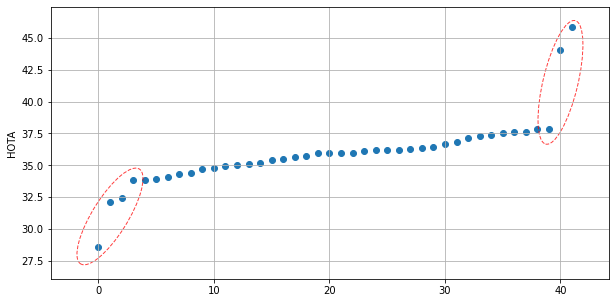

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(range(df_all_evals["HOTA"].size), df_all_evals["HOTA"].astype(float).sort_values().values)
ellipse = Ellipse((1, 31), 3,9,-35, fill=False, ls='--', color=(1,0,0,0.75))
ax.add_patch(ellipse)
ellipse = Ellipse((40, 41.5), 3,10,-15, fill=False, ls='--', color=(1,0,0,0.75))
ax.add_patch(ellipse)
plt.ylabel("HOTA")
plt.grid(True)
plt.savefig("evaluation_rs_plot.pdf", bbox_inches='tight')
plt.show()